# PERÚ, VENEZUELA Y EL SALVADOR: LATINOBARÓMETRO 2023
Vamos a comparar los tres países en dos aspectos: preferencia de gobiernos autoritarios (P10STGBS) y satisfacción con la democracia (P11STGBS.A). Desde luego, este no pretende ser un análisis profundo, solo es un primer acercamiento para visualizar insights iniciales y para demostrar el manejo de Python a nivel descriptivo usando la encuesta del Latinobarómetro, que es una de percepción (cualitativa).

## 1. LIBRERÍAS

In [96]:
!pip install -q pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## 2. CONFIGURACIÓN Y CARGA DE DATOS

In [97]:
# Ruta exacta y el nombre del archivo
directorio = r"C:\Users\alnil\Escritorio\Mis Documentos\PROYECTOS\LB2023 PERCEPCIÓN AUTORITARIA"
df = pd.read_spss("lb2023.sav", convert_categoricals=False)


In [98]:
# Base de datos original
df

,NUMINVES,IDENPA,NUMENTRE,REG,CIUDAD,TAMCIUD,COMDIST,EDAD,SEXO,CODIGO,...,S22.B,S23,S24,REEEDUC.1,REEDUC.2,REEDUC.3,REEDAD,PERPART,FAMPART,WT
0,23.0,32.0,1.0,32001.0,32001001.0,8.0,1.0,67.0,2.0,1.0,...,NaN,NaN,3.0,5.0,2.0,NaN,4.0,3.0,0.0,0.881633
1,23.0,32.0,2.0,32001.0,32001001.0,8.0,1.0,29.0,2.0,1.0,...,NaN,NaN,3.0,4.0,2.0,NaN,2.0,1.0,30.0,0.881633
2,23.0,32.0,3.0,32001.0,32001001.0,8.0,1.0,71.0,1.0,1.0,...,NaN,NaN,3.0,4.0,2.0,NaN,4.0,1.0,30.0,0.881633
3,23.0,32.0,4.0,32001.0,32001001.0,8.0,1.0,31.0,1.0,1.0,...,NaN,NaN,3.0,5.0,2.0,NaN,2.0,2.0,20.0,0.881633
4,23.0,32.0,5.0,32001.0,32001001.0,8.0,1.0,28.0,1.0,1.0,...,NaN,8.0,2.0,5.0,5.0,5.0,2.0,1.0,30.0,0.881633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19200,23.0,862.0,936.0,862028.0,862015004.0,3.0,160808.0,36.0,2.0,5.0,...,NaN,4.0,2.0,7.0,5.0,2.0,2.0,4.0,0.0,1.113280
19201,23.0,862.0,937.0,862028.0,862015004.0,3.0,160808.0,24.0,2.0,5.0,...,NaN,NaN,4.0,4.0,0.0,NaN,1.0,2.0,98.0,1.355230
19202,23.0,862.0,938.0,862028.0,862015004.0,3.0,160808.0,22.0,1.0,5.0,...,NaN,NaN,3.0,4.0,1.0,NaN,1.0,2.0,98.0,1.504640
19203,23.0,862.0,908.0,862028.0,862015004.0,4.0,160801.0,81.0,2.0,5.0,...,NaN,NaN,3.0,3.0,1.0,NaN,4.0,1.0,95.0,0.659740


In [99]:
# Seleccionamos las variables de interés
variables = ['SEXO', 'P1ST', 'IDENPA', 'EDAD', 'P10STGBS', 'P11STGBS.A']
df = df[variables].copy()
df.head()

,SEXO,P1ST,IDENPA,EDAD,P10STGBS,P11STGBS.A
0,2.0,3.0,32.0,67.0,1.0,4.0
1,2.0,4.0,32.0,29.0,2.0,4.0
2,1.0,2.0,32.0,71.0,1.0,3.0
3,1.0,3.0,32.0,31.0,1.0,3.0
4,1.0,3.0,32.0,28.0,1.0,2.0


## 3. LIMPIEZA Y PREPARACIÓN

In [ ]:
# Filtrar Perú (604), Venezuela (862) y El Salvador (222) de IDENPA. El resto se elimina
df = df[df['IDENPA'].isin([604, 862, 222])].copy()

# 1. VARIABLES PARA ENTENDER EL CÓDIGO MEJOR: IDENPA, SEXO_R Y GEDAD
# PAIS
df['PAIS'] = df['IDENPA'].map({604: 'Perú', 862: 'Venezuela', 222: 'El Salvador'})

# SEXO_R
df['SEXO_R'] = df['SEXO'].map({1: 'Hombre', 2: 'Mujer'}) 

# GEDAD
cortes = [15, 29, 44, 64, 100] 
años = ["16 a 29 años", 
             "30 a 44 años", 
             "45 a 64 años", 
             "65 a más"]
df['GEDAD'] = pd.cut(df['EDAD'], bins=cortes, labels=años) # Creamos la nueva variable 'GEDAD' propiamente


In [101]:
# 2. VARIABLES DE INTERÉS: P10STGBS_R Y P11STGBS.A_R
# P10STGBS_R
forma_gobierno = {1: 'Democracia es preferible',
                  2: 'Autoritarismo es preferible a veces', 
                  3: 'Da lo mismo'}
df['P10STGBS_R'] = df['P10STGBS'].map(forma_gobierno) # Los códigos 8 y 0 de P10STGBS desaparecen automáticamente aquí
orden_forma_gobierno = ['Democracia es preferible',
                        'Autoritarismo es preferible a veces',
                        'Da lo mismo'] # Ordenamos
df['P10STGBS_R'] = pd.Categorical(df['P10STGBS_R'], categories=orden_forma_gobierno, ordered=True) # Ordenamos

#P11STGBS.A_R
satisfaccion_democracia = {1: 'Satisfecho', # 1: "Muy satisfecho"; 2: "Más bien satisfecho". Juntamos 1 y 2 en "Satisfecho"
              2: 'Satisfecho', 
              3: 'No muy satisfecho', 
              4: 'Nada satisfecho'}
df['P11STGBS.A_R'] = df['P11STGBS.A'].map(satisfaccion_democracia) # Los códigos 8 y 0 de P11STGBS.A desaparecen automáticamente aquí
orden_satisfaccion_democracia = ['Satisfecho',
                                 'No muy satisfecho', 
                                 'Nada satisfecho'] # Ordenamos 
df['P11STGBS.A_R'] = pd.Categorical(df['P11STGBS.A_R'], categories=orden_satisfaccion_democracia, ordered=True) # Ordenamos

df

,SEXO,P1ST,IDENPA,EDAD,P10STGBS,P11STGBS.A,PAIS,SEXO_R,GEDAD,P10STGBS_R,P11STGBS.A_R
9204,2.0,3.0,222.0,21.0,3.0,4.0,El Salvador,Mujer,16 a 29 años,Da lo mismo,Nada satisfecho
9205,2.0,1.0,222.0,28.0,1.0,2.0,El Salvador,Mujer,16 a 29 años,Democracia es preferible,Satisfecho
9206,1.0,2.0,222.0,67.0,1.0,1.0,El Salvador,Hombre,65 a más,Democracia es preferible,Satisfecho
9207,2.0,3.0,222.0,40.0,3.0,3.0,El Salvador,Mujer,30 a 44 años,Da lo mismo,No muy satisfecho
9208,1.0,1.0,222.0,19.0,3.0,2.0,El Salvador,Hombre,16 a 29 años,Da lo mismo,Satisfecho
...,...,...,...,...,...,...,...,...,...,...,...
19200,2.0,2.0,862.0,36.0,2.0,3.0,Venezuela,Mujer,30 a 44 años,Autoritarismo es preferible a veces,No muy satisfecho
19201,2.0,3.0,862.0,24.0,NaN,NaN,Venezuela,Mujer,16 a 29 años,NaN,NaN
19202,1.0,1.0,862.0,22.0,1.0,3.0,Venezuela,Hombre,16 a 29 años,Democracia es preferible,No muy satisfecho
19203,2.0,1.0,862.0,81.0,3.0,4.0,Venezuela,Mujer,65 a más,Da lo mismo,Nada satisfecho


## 4. ANÁLISIS DESCRIPTIVO

#### 4.1. TABLAS CRUZADAS

In [102]:
# 1. DISTRIBUCIÓN DE SEXO POR PAÍS
print("1. DISTRIBUCIÓN DE SEXO POR PAÍS")
tabla_sexo = pd.crosstab(df['SEXO_R'], #margins es para totales
                         df['PAIS'], 
                         margins=True, margins_name="Total")
print(tabla_sexo)

1. DISTRIBUCIÓN DE SEXO POR PAÍS
PAIS    El Salvador  Perú  Venezuela  Total
SEXO_R                                     
Hombre          450   600        487   1537
Mujer           550   600        714   1864
Total          1000  1200       1201   3401


Lo anterior es para verificar que la extracción haya sido realizada correctamente, dado que son alrededor de 1200 personas por país encuestadas en el Latinobarómetro para Perú y Venezuela y 1000 para El Salvador. Esta información se encuentra en los documentos de la misma página del Latinobarómetro.

In [103]:
# 2. PERCEPCIÓN DE LA FORMA DE GOBIERNO SEGÚN PAÍS
print("2. PERCEPCIÓN DE LA FORMA DE GOBIERNO SEGÚN PAÍS")
tabla_forma_gobierno = pd.crosstab(df['P10STGBS_R'], 
                    df['PAIS'], 
                    normalize='columns') * 100
print(tabla_forma_gobierno.round(1)) # Mostramos porcentajes con un decimal
print("\n")

# 3. PERCEPCIÓN DE LA SATISFACCIÓN DE LA DEMOCRACIA POR PAÍS
print("3. PERCEPCIÓN DE LA SATISFACCIÓN DE LA DEMOCRACIA POR PAÍS")
tabla_satisfaccion_democracia = pd.crosstab(df['P11STGBS.A_R'], 
                              df['PAIS'], 
                              normalize='columns') * 100
print(tabla_satisfaccion_democracia.round(1)) # Mostramos porcentajes con un decimal

2. PERCEPCIÓN DE LA FORMA DE GOBIERNO SEGÚN PAÍS
PAIS                                 El Salvador  Perú  Venezuela
P10STGBS_R                                                       
Democracia es preferible                    52.6  53.8       66.3
Autoritarismo es preferible a veces         17.7  17.7       11.7
Da lo mismo                                 29.7  28.5       22.1


3. PERCEPCIÓN DE LA SATISFACCIÓN DE LA DEMOCRACIA POR PAÍS
PAIS               El Salvador  Perú  Venezuela
P11STGBS.A_R                                   
Satisfecho                66.9   8.0       16.7
No muy satisfecho         26.4  48.7       42.6
Nada satisfecho            6.7  43.2       40.7


**INTERPRETACIONES:**

* **El Salvador**: Hay más gente satisfecha con la democracia que gente que la prefiere. Sugiere que la ciudadanía está validando la legitimidad de ejercicio (resultados, seguridad, "mano dura") por encima de la legitimidad de origen del poder (reglas democráticas). La gente está feliz con el gobierno actual y decide llamar a eso democracia, más allá de posibles derivaciones autoritarias en camino.

* **Perú** Solo un 8% está "Satisfecho" con la democracia, siendo el peor resultado. Además, el 43.2% está "Nada satisfecho", más que Venezuela. Esto no es solo una crisis de gobierno, es una crisis sistémica. A diferencia de Venezuela (donde se culpa al régimen), en Perú la insatisfacción parece ser una apatía estructural: la democracia sigue siendo preferible teóricamente (53.8%), pero en la práctica, el ciudadano siente que el sistema no le entrega nada. Es el caldo de cultivo perfecto para un "outsider".

* **Venezuela**: Ocurre lo opuesto a El Salvador. Venezuela tiene el apoyo a la democracia más alto de los tres (66.3%), pero una satisfacción bajísima (16.7%). El hecho de vivir en un régimen autoritario ha revalorizado la democracia como aspiración. No están satisfechos porque su realidad no coincide con su alto ideal democrático. Es una democracia aspiracional.

In [104]:
# 4. PERCEPCIÓN DE LA FORMA DE GOBIERNO SEGÚN PAÍS Y GRUPOS ETARIOS
print("4. PERCEPCIÓN DE LA FORMA DE GOBIERNO SEGÚN PAÍS Y GRUPOS ETARIOS")
tabla_forma_gobierno_edad = pd.crosstab(index=df['P10STGBS_R'], 
                    columns=[df['PAIS'], df['GEDAD']], 
                    normalize='columns') * 100

# Transponemos la tabla para una mejor visualización: Invierte filas y columnas
# Ahora los Países/Edades estarán en las filas y las categorías ()"Democracia es preferible", etc.) en columnas.
tabla_forma_gobierno_edad = tabla_forma_gobierno_edad.transpose() # Chancamos la tabla
display(tabla_forma_gobierno_edad.round(1))

4. PERCEPCIÓN DE LA FORMA DE GOBIERNO SEGÚN PAÍS Y GRUPOS ETARIOS


P10STGBS_R                Democracia es preferible  \
PAIS        GEDAD                                    
El Salvador 16 a 29 años                      43.2   
            30 a 44 años                      52.0   
            45 a 64 años                      61.1   
            65 a más                          60.8   
Perú        16 a 29 años                      51.4   
            30 a 44 años                      53.4   
            45 a 64 años                      55.6   
            65 a más                          61.4   
Venezuela   16 a 29 años                      45.4   
            30 a 44 años                      58.8   
            45 a 64 años                      77.5   
            65 a más                          79.0   

P10STGBS_R                Autoritarismo es preferible a veces  Da lo mismo  
PAIS        GEDAD                                                           
El Salvador 16 a 29 años                                 26.4         30.4  
            30 a 44 años                                 11.9         36.1  
            45 a 64 años                                 15.1         23.8  
            65 a más                                     11.3         27.8  
Perú        16 a 29 años                                 22.3         26.3  
            30 a 44 años                                 15.5         31.1  
            45 a 64 años                                 16.5         28.0  
            65 a más                                      9.1         29.5  
Venezuela   16 a 29 años                                 18.9         35.7  
            30 a 44 años                                 13.7         27.5  
            45 a 64 años                                  7.3         15.1  
            65 a más                                      9.1         11.9

Los datos sugieren que la democracia en la región en frente varios retos a nivel democrático. En los países mostrados, los retos son:
* **El Salvador**: Preferencia autoritaria por parte de los jóvenes (43.2%), influenciado por el factor Bukele y su uso de redes sociales como propaganda política.
* **Venezuela**: Brecha generacional de apoyo a la democracia (79% en mayores de 65 años vs 45% en jóvenes), probablemente porque las personas mayores vivieron el periodo pre-chavista, donde Venezuela era conocida como "La Perla" de América Latina en los años 70s gracias a su bonanza petrolera.
* **Perú**: Indiferencia generalizada en todos los sectores (al alrededor del 30%) debido a una orfandad política.

In [105]:
# 5. SATISFACCIÓN CON LA DEMOCRACIA SEGÚN PAÍS Y GRUPOS ETARIOS
print("5. SATISFACCIÓN CON LA DEMOCRACIA SEGÚN PAÍS Y GRUPOS ETARIOS")
tabla_satisfaccion_democracia_edad = pd.crosstab(index=df['P11STGBS.A_R'], 
                                 columns=[df['PAIS'], df['GEDAD']], 
                                 normalize='columns') * 100

# Transponemos
tabla_satisfaccion_democracia_edad = tabla_satisfaccion_democracia_edad.T 
display(tabla_satisfaccion_democracia_edad.round(1))

5. SATISFACCIÓN CON LA DEMOCRACIA SEGÚN PAÍS Y GRUPOS ETARIOS


P11STGBS.A_R              Satisfecho  No muy satisfecho  Nada satisfecho
PAIS        GEDAD                                                       
El Salvador 16 a 29 años        68.2               27.8              4.0
            30 a 44 años        65.2               25.7              9.1
            45 a 64 años        64.0               28.3              7.7
            65 a más            74.6               19.5              5.9
Perú        16 a 29 años        11.6               54.0             34.4
            30 a 44 años         5.9               46.6             47.4
            45 a 64 años         7.1               44.1             48.8
            65 a más             3.9               48.5             47.6
Venezuela   16 a 29 años        11.8               51.7             36.6
            30 a 44 años        10.9               46.2             42.8
            45 a 64 años        18.2               37.6             44.1
            65 a más            29.3               36.4             34.2

Hallazgos interesantes:
* **El Salvador**: La satisfacción con la democracia es unánime, rompiéndose el mito de que el apoyo a Bukele es solo cosa de "jóvenes radicales". Los adultos mayores, que vivieron la guerra civil y la posguerra, están validando el modelo actual masivamente. Hay una **Legitimidad de desempeño**: los mayores sienten que su calidad de vida ha mejorado.

* **Perú**: Los jóvenes (16-29) tienen un "pobre" 11.6% de satisfacción, pero los mayores (65+) caen a un minúsculo 3.9%. ¡Casi cero!

* **Venezuela**: Ocurre lo contrario a Perú. La satisfacción en los jóvenes (16-29) es bajísima (11.8%), casi idéntica a la de Perú. Sin embargo, en los mayores de 65 años, la satisfacción sube a casi el triple (29.3%). ¿Por qué? **Hipótesis de la Dependencia**: Es muy probable que este dato refleje la dependencia de las transferencias estatales (bonos, pensiones) que atan a la tercera edad al Estado, mientras que los jóvenes, que buscan empleo y futuro (y no lo encuentran), sienten la crisis con mayor crudeza. Es un país que expulsa emocionalmente a sus jóvenes pero retiene a sus mayores.

#### 4.2. GRÁFICOS

In [106]:
# PREPARACIÓN

# Configuración general para que los gráficos se vean más grandes y nítidos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 120 # Mayor resolución

# PALETA PARA GRÁFICO 1: FORMA DE GOBIERNO
# Contrastamos Democracia vs. Autoritarismo.
colores_forma_gobierno_edad = {
    'Democracia es preferible': '#2ecc71',            # Verde esmeralda (Positivo)
    'Autoritarismo es preferible a veces': '#e74c3c', # Rojo (Negativo/Alerta)
    'Da lo mismo': '#95a5a6'                          # Gris (Neutro/Indiferencia)
}

# PALETA PARA GRÁFICO 2: SATISFACCIÓN CON LA DEMOCRACIA
# Un semáforo simple: Verde -> Amarillo/Naranja -> Rojo
colores_satisfaccion_democracia_edad = {
    'Satisfecho': '#27ae60',         # Verde fuerte
    'No muy satisfecho': '#f1c40f',  # Amarillo/Naranja
    'Nada satisfecho': '#c0392b'     # Rojo oscuro
}

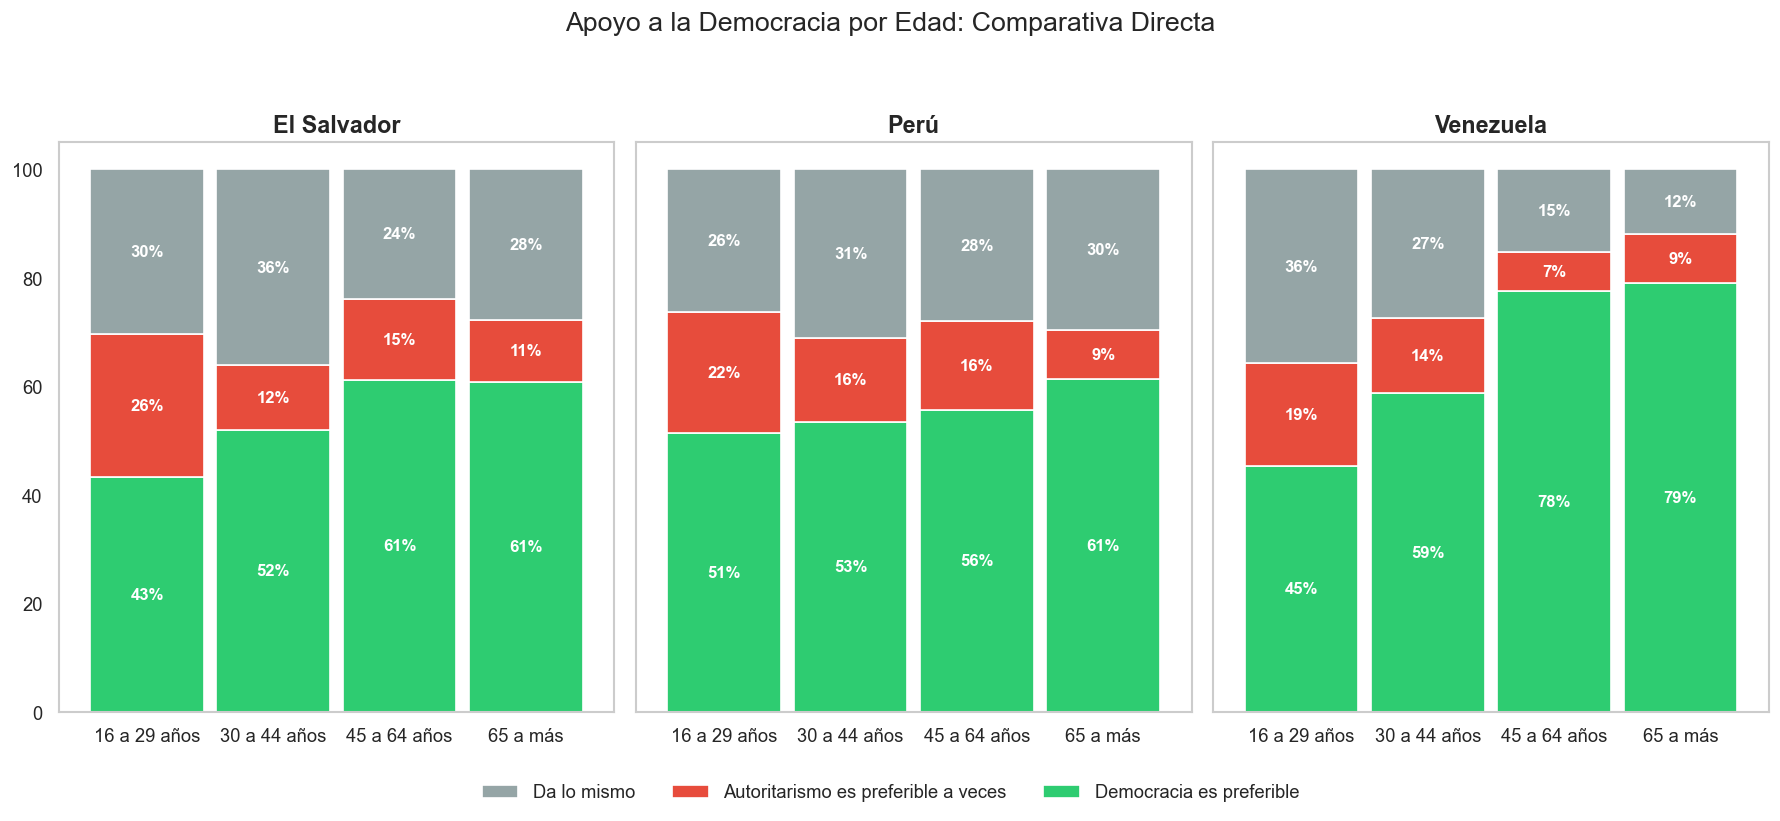

In [107]:
# GRÁFICO 1: APOYO A LA DEMOCRACIA (ESTILO PANELES)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

paises = ['El Salvador', 'Perú', 'Venezuela']

# Orden específico para que las barras se apilen con sentido lógico: primero Democracia abajo, luego Autoritarismo, luego Indiferente arriba)
orden_apoyo = ['Democracia es preferible', 'Autoritarismo es preferible a veces', 'Da lo mismo']

for i, pais in enumerate(paises):
    # 1. Filtramos datos
    df_pais = df[df['PAIS'] == pais]
    
    # 2. Cruzamos variables (Edad vs Apoyo)
    ct = pd.crosstab(df_pais['GEDAD'], df_pais['P10STGBS_R'], normalize='index') * 100
    
    # 3. Reordenamos columnas para consistencia visual
    cols_validas = [c for c in orden_apoyo if c in ct.columns]
    ct = ct[cols_validas]
    
    # 4. Graficamos
    ct.plot(kind='bar', stacked=True, ax=axes[i], 
            color=colores_forma_gobierno_edad, width=0.9, edgecolor='white')
    
    # 5. Estética
    axes[i].set_title(pais, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0) 
    axes[i].grid(False)
    axes[i].get_legend().remove()
    
    # 6. Etiquetas de datos
    for c in axes[i].containers:
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
        axes[i].bar_label(c, labels=labels, label_type='center', 
                          color='white', fontweight='bold', fontsize=10)

plt.suptitle("Apoyo a la Democracia por Edad: Comparativa Directa", fontsize=16, y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
# Invertimos leyenda para que coincida visualmente con el apilado
fig.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3, frameon=False)

plt.tight_layout()
plt.show()

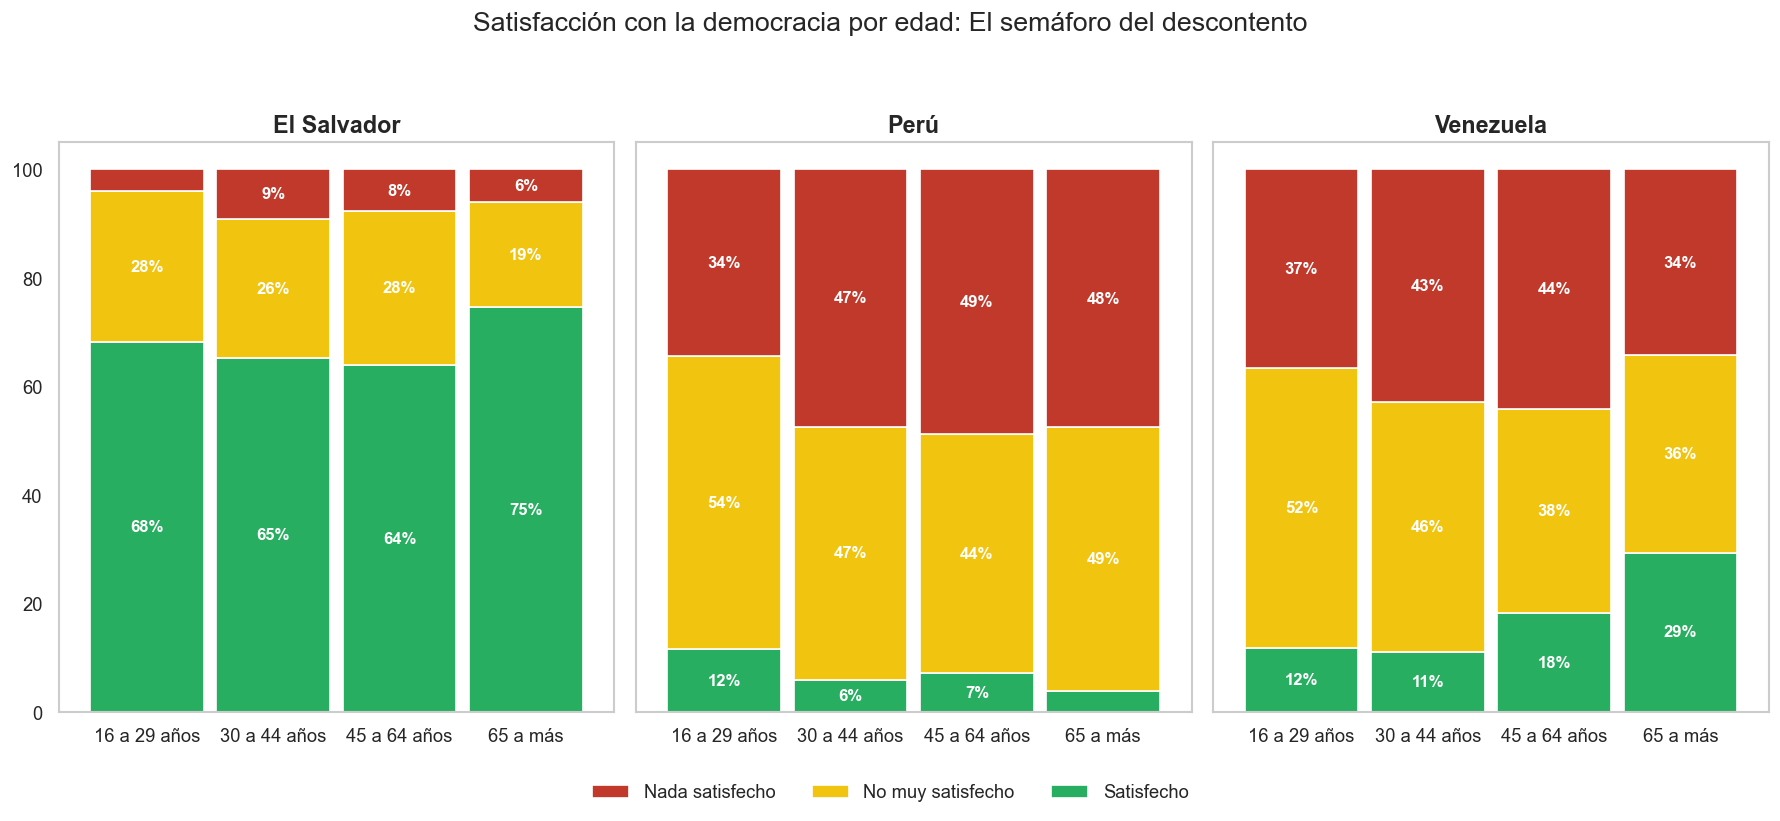

In [108]:
# GRÁFICO 2: SATISFACCIÓN (ESTILO PANELES)
# GRÁFICO MÁS RELEVANTE POR EL 3.9% DE APOYO A LA DEMOCRACIA POR PARTE DE PERÚ EN LOS MAYORES

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

paises = ['El Salvador', 'Perú', 'Venezuela']

# Definimos el orden lógico para apilar las barras (Semáforo: Verde abajo -> Rojo arriba)
# Asegúrate de que estos textos coincidan EXACTAMENTE con tus datos
orden_apilado = ['Satisfecho', 'No muy satisfecho', 'Nada satisfecho']

for i, pais in enumerate(paises):
    # 1. Filtramos datos
    df_pais = df[df['PAIS'] == pais]
    
    # 2. Cruzamos Variable de Edad vs. Satisfacción (P11STGBS.A_R)
    ct = pd.crosstab(df_pais['GEDAD'], df_pais['P11STGBS.A_R'], normalize='index') * 100
    
    # 3. Reordenamos las columnas para que el semáforo tenga sentido visual
    columnas_presentes = [c for c in orden_apilado if c in ct.columns]
    ct = ct[columnas_presentes]
    
    # 4. Graficamos: Usamos la paleta de colores de satisfacción
    ct.plot(kind='bar', stacked=True, ax=axes[i], 
            color=colores_satisfaccion_democracia_edad, width=0.9, edgecolor='white')
    
    # 5. Títulos y limpieza
    axes[i].set_title(pais, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0) 
    axes[i].grid(False) 
    
    # Quitamos leyenda individual
    axes[i].get_legend().remove()
    
    # 6. Etiquetas de datos
    for c in axes[i].containers:
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 4 else '' for v in c]  # Etiquetamos si el segmento es mayor al 4% para que se lea bien
        
        axes[i].bar_label(c, labels=labels, label_type='center', 
                          color='white', fontweight='bold', fontsize=10)

# Título y Leyenda Global
plt.suptitle("Satisfacción con la democracia por edad: El semáforo del descontento", fontsize=16, y=1.05)
handles, labels = axes[0].get_legend_handles_labels()

# Ajustamos la leyenda para que aparezca en el orden del apilado (invertimos handles/labels)
fig.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3, frameon=False)

plt.tight_layout()
plt.show()

Visualmente vemos que el apoyo a la democracia en Perú es ínfimo a comparación de El Salvadoar.

## 5. COMENTARIOS FINALES

El análisis comparado de El Salvador, Perú y Venezuela revela que la crisis democrática en América Latina no es homogénea, sino que presenta tres patologías distintas según la relación entre apoyo (teoría) y satisfacción (práctica):

* **El Salvador (La paradoja de la eficacia)**: Es el caso más disruptivo. A pesar de tener el menor apoyo teórico a la democracia entre los jóvenes (quienes coquetean abiertamente con el autoritarismo), registra los niveles más altos de satisfacción (sobre el 60-70%). Esto sugiere que la ciudadanía está validando la legitimidad de ejercicio (resultados/seguridad) por encima de la legitimidad de origen (reglas democráticas).

* **Perú (La apatía estructural)**: Muestra el escenario más crítico de desafección. La satisfacción es casi inexistente (cayendo al 1% en adultos mayores) y el apoyo a la democracia compite con una alta indiferencia ("Da lo mismo"). No hay una demanda de autoritarismo fuerte, sino una renuncia al sistema: la democracia se percibe como un mecanismo inútil que no resuelve problemas reales.

* **Venezuela (La brecha generacional)**: Presenta una fractura demográfica. Mientras los adultos mayores (65+) sostienen la defensa de la democracia como ideal (casi 80% de apoyo), los jóvenes muestran niveles de indiferencia similares a los peruanos. La satisfacción es baja, pero el repunte en la tercera edad sugiere una dependencia de las estructuras estatales o una "resiliencia nostálgica".

En resumen: Mientras El Salvador cambia democracia por resultados y Venezuela se aferra a la democracia como ideal nostálgico, Perú parece haber caído en un "nihilismo político" donde el sistema ha perdido toda relevancia para el ciudadano común.